# <center>Predicting Customer Retention For SyriaTel Mobile Telecom</center>
---

## <b> Project Overview </b>
The objective of this project was to develop a binary classification model to predict whether a customer of SyriaTel, a telecommunications company, is likely to stop doing business in the near future.

The primary goal was to identify predictable patterns in customer behavior in order to help the company reduce financial losses associated with customer churn. 



---
## <b> 1. Business Understanding </b>

SyriaTel is a telecommunications company that operates in Syria. The company offers a range of services, including mobile and fixed-line telephony, internet, and data services. As with any telecommunications company, SyriaTel is concerned about churn, which is when a customer decides to switch to a competitor or discontinue service altogether. Churn is a crucial metric for SyriaTel as it affects its revenue and profitability. Therefore, the company wants to minimize churn and retain as many customers as possible.


### <b> Problem Statement </b>
SyriaTel would like to maintain/increase the customer retention rate as well as seeking to address the challenge of customer churn by developing an accurate binary classification model that predicts the likelihood of customers discontinuing their services.





### <b> Objectives of the Company </b>

The main objective of SyriaTel is to provide high-quality telecommunications services to its customers and grow its market share. This includes increasing revenue, profits, and customer satisfaction. However, in order to achieve these goals, the company needs to ensure that its customers remain loyal and do not churn.

### <b> Objectives of the Project </b>

The main objective of this churn prediction project is to help SyriaTel identify potential churners and take proactive measures to retain them. The project aims to build a predictive model that can identify customers who are likely to churn, based on their past behavior and usage patterns. This will allow SyriaTel to reach out to these customers and offer them relevant incentives or promotions to retain them.

The specific goals of this project are as follows:
1. Develop a predictive model that can accurately identify potential churners.
2. Utilize historical customer data to train and validate the predictive model.
3. Identify the key factors that contribute to churn and use them to fine-tune the model.
4. Generate actionable insights that can be used to retain potential churners.
5. Deliver the predictive model in a way that is easy to use and integrate into SyriaTel's existing systems.
6. Identify predictable patterns and insights in customer behavior to proactively identify customers at a high risk of churning.
7. Enable SyriaTel to optimize retention strategies, allocate resources effectively, and minimize financial losses associated with customer churn.

Overall, the objectives of the project align with the company's goal of minimizing churn and maximizing customer retention. By accurately predicting churn, SyriaTel can take proactive measures to retain customers and ensure its long-term success in the highly competitive telecommunications industry.





# **Import libraries**

In [1]:
# Import modules & packages

# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.express as px

# Customization
custom_color = custom_colors = ["#BE5A83", "#F2B6A0", "#FEF2F4"]

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report, ConfusionMatrixDisplay # performance metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

# 2.**Import Data**

In [2]:
data = pd.read_csv('Telecom.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
#Shape of the dataframe
print("The number of rows: {}".format(data.shape[0]))

print("The number of columns:{}".format(data.shape[1]))

The number of rows: 3333
The number of columns:21


In [5]:
data.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
numerical_vars = data.select_dtypes(include=['int64', 'float64']).columns  

# removing area code from the numerical variables
numerical_vars = [col for col in numerical_vars if col != 'area code']

# adding 'area code' into the categorical variables
categorical_vars = list(data.select_dtypes(include=['object', 'bool']).columns )+ ['area code']

print("The Numerical Variables are:", numerical_vars)
print("\n")
print("The Categorical Variables are:", categorical_vars)

The Numerical Variables are: ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


The Categorical Variables are: ['state', 'phone number', 'international plan', 'voice mail plan', 'churn', 'area code']


## <b> 3. Data Preparation </b>


##  Data Cleaning

In [7]:
# This function will check the datatypes within the dataframe
def check_data_types(dataframe):
    data_types = dataframe.dtypes
    print(data_types)

# Run the function
check_data_types(data)

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [8]:
#Checking for null and misssing values
print("There are", data.isnull().values.sum(), "missing values in the dataset")

There are 0 missing values in the dataset


In [9]:
# Functions for duplicate values

# A function that checks for duplicate values in a column
def count_duplicates(data, column_name):
    duplicate_count = data.duplicated(subset=column_name).sum()
    return duplicate_count

# Check for duplicates in the phone number column -- this is because the phone number is a unique identifier so there shouldn't be duplicates
count_duplicates(data, "phone number")

0

In [10]:
# We will change the datatype of area code from an int to an object

data['area code'] = data['area code'].astype(object)
data['area code'].dtype # Check if the change has been made


dtype('O')

In [11]:
data = data.drop("phone number", axis=1)


## 4  Exploratory Data Analysis

## 4.1 Univariate Analysis

The exploration commences with a detailed univariate analysis, scrutinizing each variable in isolation to gauge its individual characteristics and distribution. This foundational step is critical for establishing a baseline understanding of the dataset's intrinsic properties, essential for informed hypothesis formulation and subsequent multivariate analyses.

### Explore Target Variable: `churn`

Let's inspect the number churned customers in this dataset:

In [12]:
churn_vals = pd.DataFrame(data.churn.value_counts())
churn_vals

,count
churn,
False,2850
True,483


The proportion of customers who churned - remember, `True` means the customer churned:

In [13]:
churn_perc = pd.DataFrame(data.churn.value_counts()/len(data.churn))
churn_perc

,count
churn,
False,0.855086
True,0.144914


We can take note that majority of the customers 85.5% had not churned (2850), while 14.5 % had churned(483). 

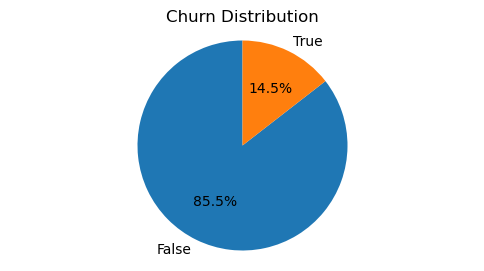

In [14]:
# representing the same using a Pie Chart to visualize the percentages
churn_counts = data['churn'].value_counts()

# Create a new figure with a larger size
plt.figure(figsize=(6, 3))

# Create a pie chart
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Of the `3,333 customers` in the dataset, 483 terminated their contract with the Telecom firm. That is 14.5% of customers lost.

The distribution of the binary classes shows a data imbalance. This needs to be addressed before modeling as an unbalanced feature can cause the model to make false predictions.

Further, we will further review the data to identify outliers, which is crucial to understanding the distribution of values for different columns. For this, our focus is on numeric data. Outliers can significantly impact the performance of machine learning models, which will impacts the feature engineering process.

### `Voice Mail  Plan Column`

In [15]:
# Counting the occurrences of responses in this column
counts1 = data['voice mail plan'].value_counts()
counts1

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

From above, there are only 'yes' and 'no' responses in this column without any other unique entry. No need for cleaning cleaning

### `International Plan Column`

In [16]:
# Counting the occurrences of responses in this column
counts = data['international plan'].value_counts()
counts

international plan
no     3010
yes     323
Name: count, dtype: int64

From above, there are only 'yes' and 'no' responses in this column with no any other unique entry. This means that information stored in this column is whether a client has an international plan or not. In that case, no need for further cleaning

 ### `Number_vmail_Messages`

In [17]:
# looking at value_counts for this column
data['number vmail messages'].value_counts()

number vmail messages
0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
22      32
35      32
39      30
34      29
37      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
16      13
41      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
50       2
9        2
8        2
11       2
48       2
49       1
4        1
10       1
51       1
Name: count, dtype: int64

Since we already checked and confirmed that there were no missing values in any of the columns. We just need to do a value_count check to confirm that all entries are valid. This helps us identify possibility of invalid data values such as `symbols`, `placeholder values`, and `punctuation marks`.

From Above, all entries are valid and the column entries are good to go with without further cleaning.

## 4.2 Bivariate Analysis
Bivariate analysis involves analyzing the relationship between two variables. For our project, we examine the relationship between each feature and the target variable (customer churn) to understand how they are related.

Here, we are doing some analysis of the customer churning in relation to `state,` `area code,` `international plan,` and `voice mail plan`. We are trying to understand whether there are correlations between the categorical columns and the customer churning rate.

### Exploring Relationship of Churn  and International Plan

In [18]:
# Count the number of churned and non-churned customers by international plan
churn_intl_plan = data.groupby(['churn', 'international plan']).size().unstack()
total_churn_itl = churn_intl_plan.sum(axis=1)  # Calculate the total count for each churn category
percentage_intl_plan = churn_intl_plan.div(total_churn_itl, axis=0) * 100  # Calculate the percentage
percentage_intl_plan

international plan,no,yes
churn,,
False,93.473684,6.526316
True,71.635611,28.364389


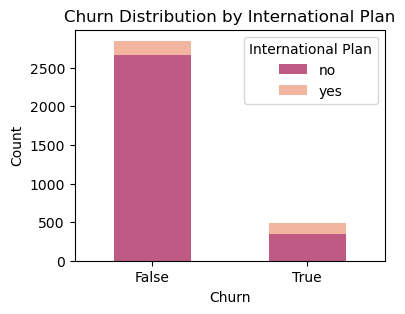

In [19]:
# Display as a bar chart

# Plots a stacked bar chart to visualize the relationship
churn_intl_plan.plot(kind='bar', stacked=True, figsize=(4,3), color=custom_colors)

plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution by International Plan')
plt.xticks(rotation=0)
plt.legend(title='International Plan')

plt.show()

Observations:

- Among customers who did not churn (churn=False), approximately 93.50% have "no" international plan, and 6.50% have "yes" international plan.
- Among customers who churned (churn=True), approximately 71.64% have "no" international plan, and 28.36% have "yes" international plan.

### Exploring Relationship of Churn  and Voicemail Plan

In [20]:
# Count the number of churned and non-churned customers by voicemail plan
churn_voicemail = data.groupby(['churn', 'voice mail plan']).size().unstack()
total_churn_vm= churn_voicemail.sum(axis=1)  # Calculate the total count for each churn category
percentage_vm = churn_voicemail.div(total_churn_vm, axis=0) * 100  # Calculate the percentage
percentage_vm

voice mail plan,no,yes
churn,,
False,70.456140,29.543860
True,83.436853,16.563147


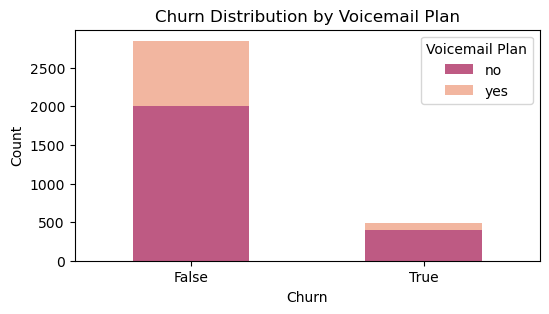

In [21]:
# Display as a bar chart

# Plot a stacked bar chart to visualize the relationship
churn_voicemail.plot(kind='bar', stacked=True, figsize=(6,3), color=custom_colors)

plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution by Voicemail Plan')
plt.xticks(rotation=0)
plt.legend(title='Voicemail Plan')

plt.show()

#### <b> Observations: </b>

- Churned customers (True): 83.44% did not have a voice mail plan (no), while 16.56% had a voice mail plan (yes).

- Non-churned customers (False): 70.46% did not have a voice mail plan (no), and 29.54% had a voice mail plan (yes).

### Exploring Relationship of Churn  and Customer Service Calls

In [22]:
CS_Calls = pd.DataFrame(data.groupby(['customer service calls'])['churn'].mean())
CS_Calls

,churn
customer service calls,
0,0.131994
1,0.103302
2,0.114625
3,0.102564
4,0.457831
5,0.606061
6,0.636364
7,0.555556
8,0.500000


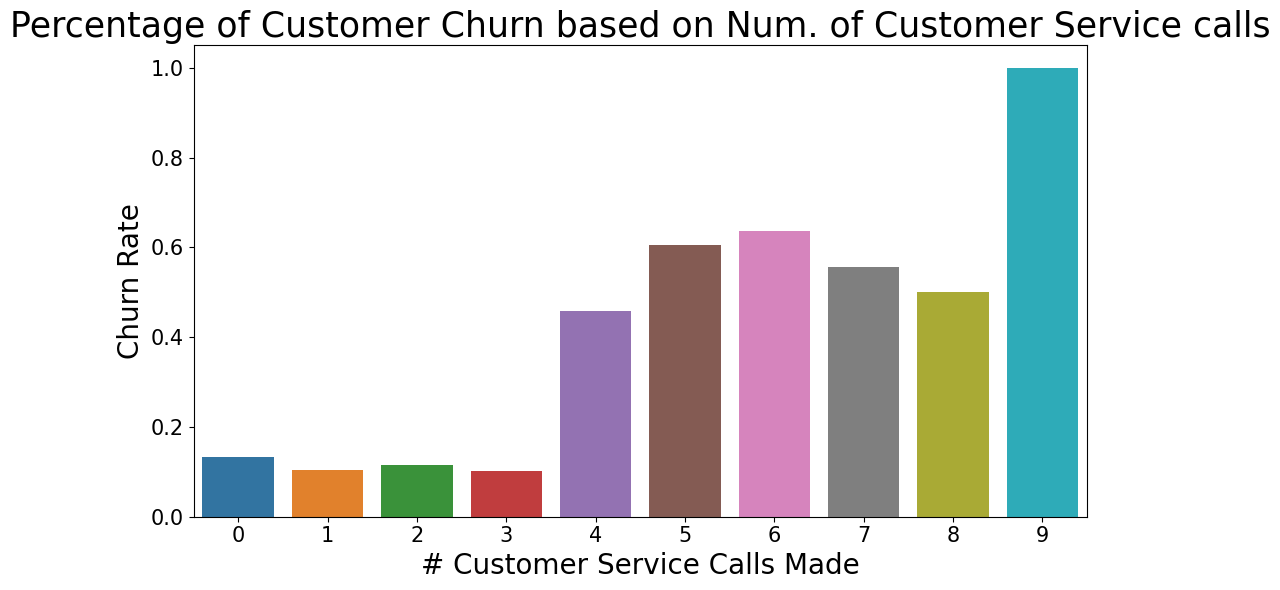

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], y = 'churn', data = CS_Calls, ax = ax)
plt.title('Percentage of Customer Churn based on Num. of Customer Service calls', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('# Customer Service Calls Made', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
plt.tight_layout()


There appears to be a huge spike in the rate of churn for customers who make 4 or more calls to customer service.  Customers who make this many calls to customer service have a churn rate over 40%.  Further investigation should be devoted to looking into the other characteristics of these customers to find out why there was a need to make this many calls to customer service and how the company could better assist these customers.

### The correlations between `different features` and `customer churning`. 


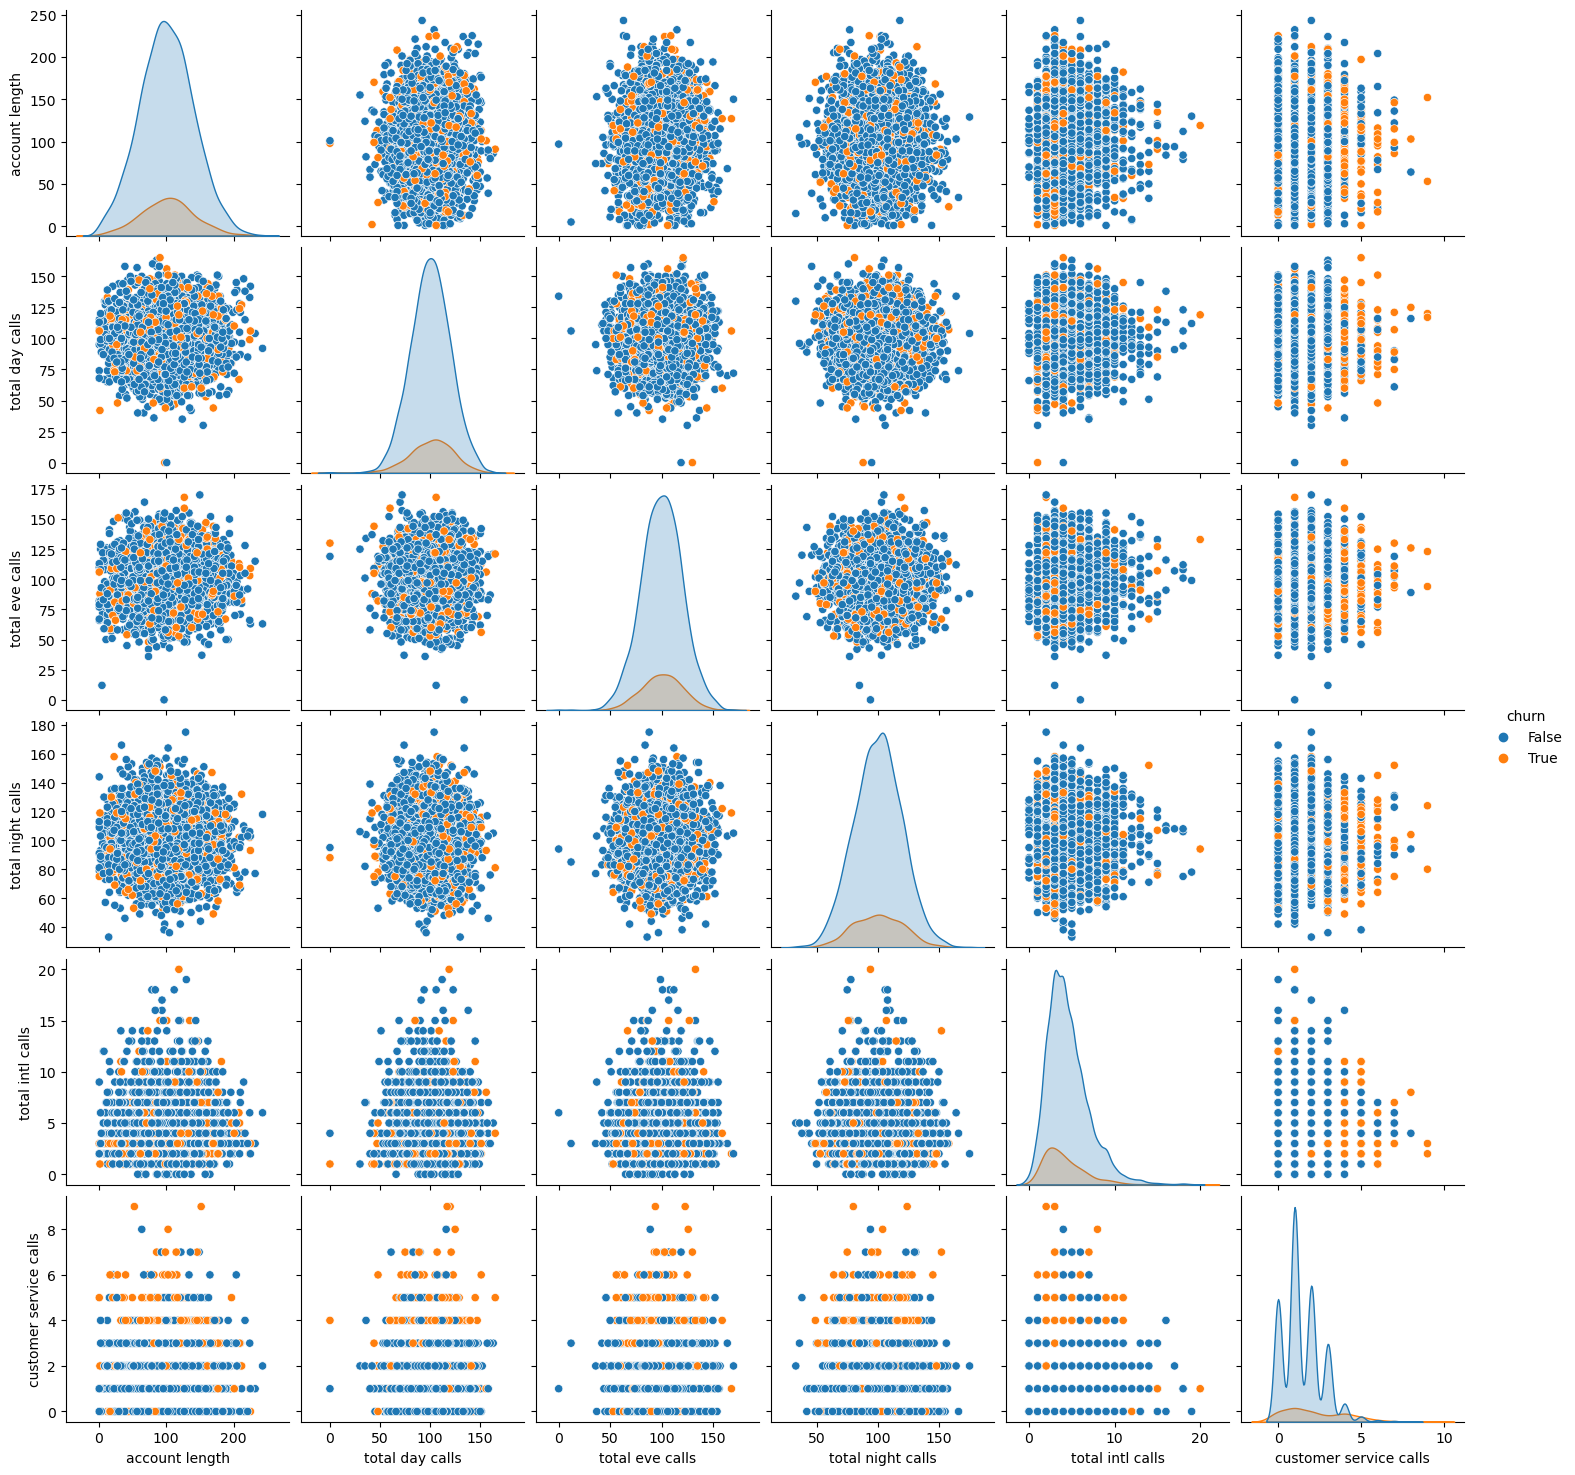

In [24]:
#plotting pairplots for numeric variables
data_temp = data[["account length","total day calls","total eve calls","total night calls",
                "total intl calls","customer service calls","churn"]]
sns.pairplot(data_temp, hue="churn",height=2.5);
plt.show();

There seems to be strong relationship between customer service calls and true churn values. After 4 calls, customers are a lot more likely to discontinue their service. 

Besides, most customer calls are are associated with disatisfaction with customer service. At this point more than 4 customer calls indicate that it takes long for their issues to be addressed, and thus a possibility of them leaving increases.

### Distribution of Features

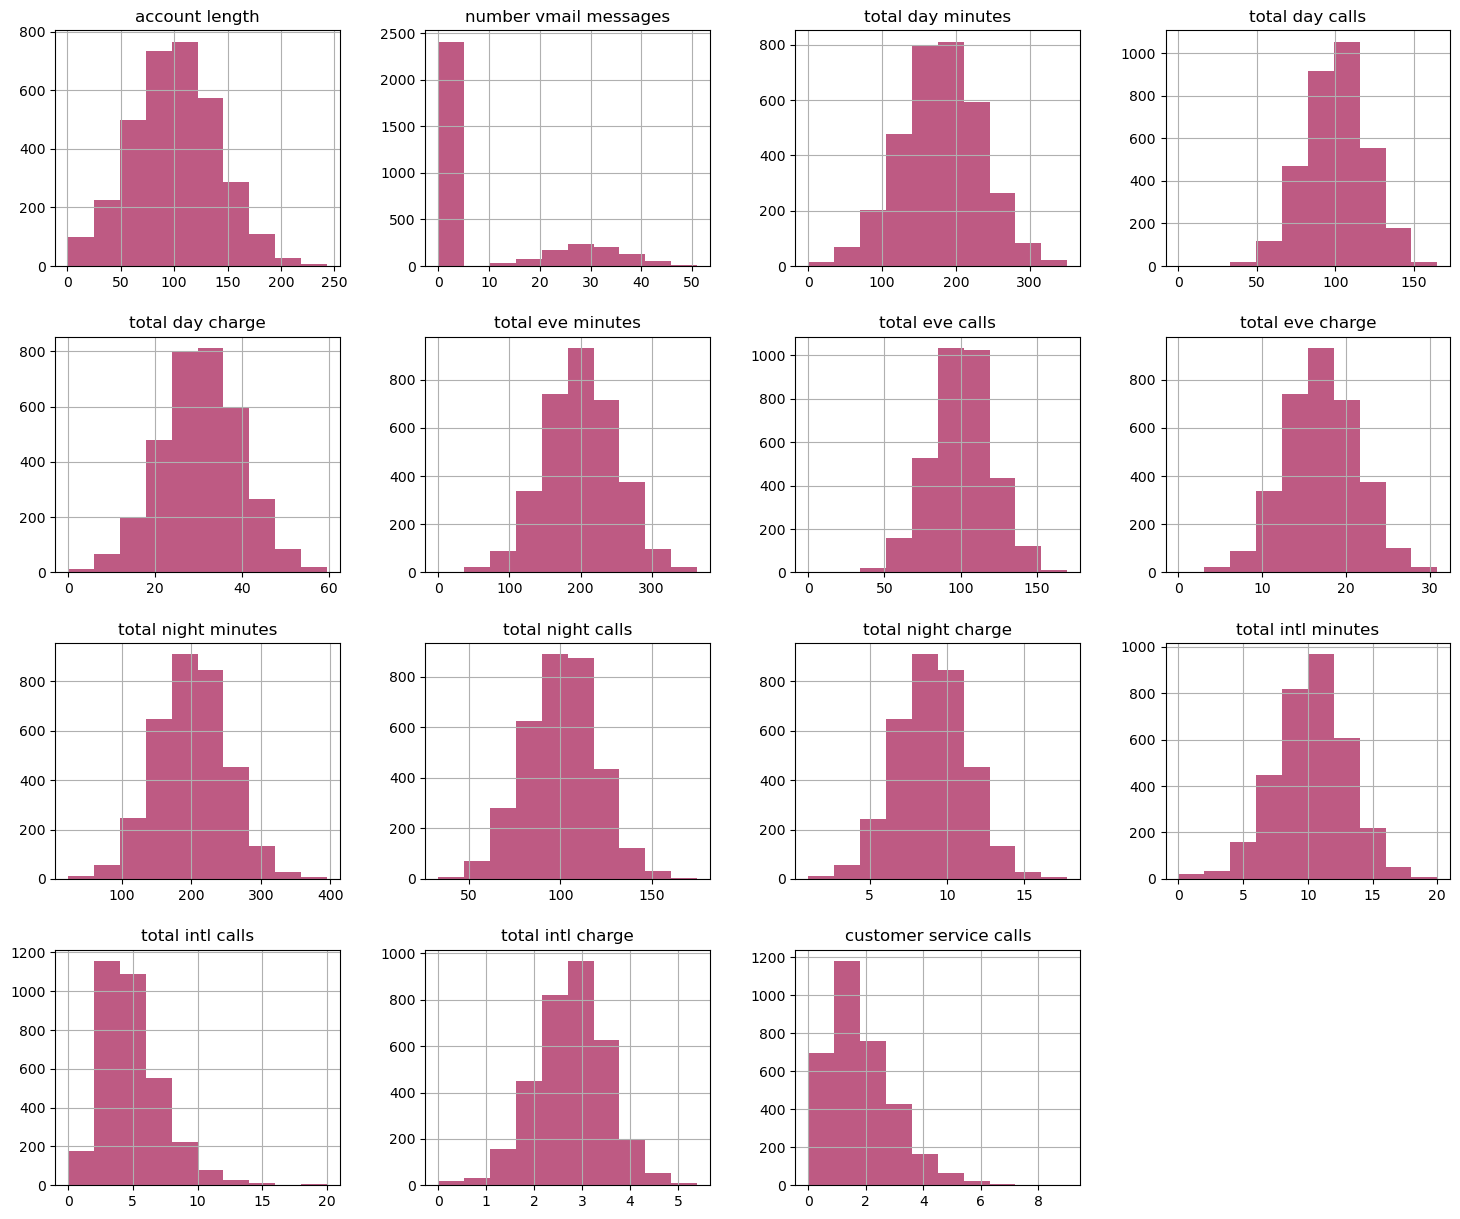

In [25]:
# The Distribution of Features

data.drop(columns='churn').hist(figsize=(18, 15), color="#BE5A83");

We notice based on this output that the features have different scalings, and we especially take note that not all of them are <b> normally distributed </b>

In [26]:
from scipy import stats
def drop_numerical_outliers(data, z_thresh=3):
    constrains = data.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    data.drop(data.index[~constrains], inplace=True)
    
drop_numerical_outliers(data)
print(data.shape)

(3169, 20)


### Checking For Outliers

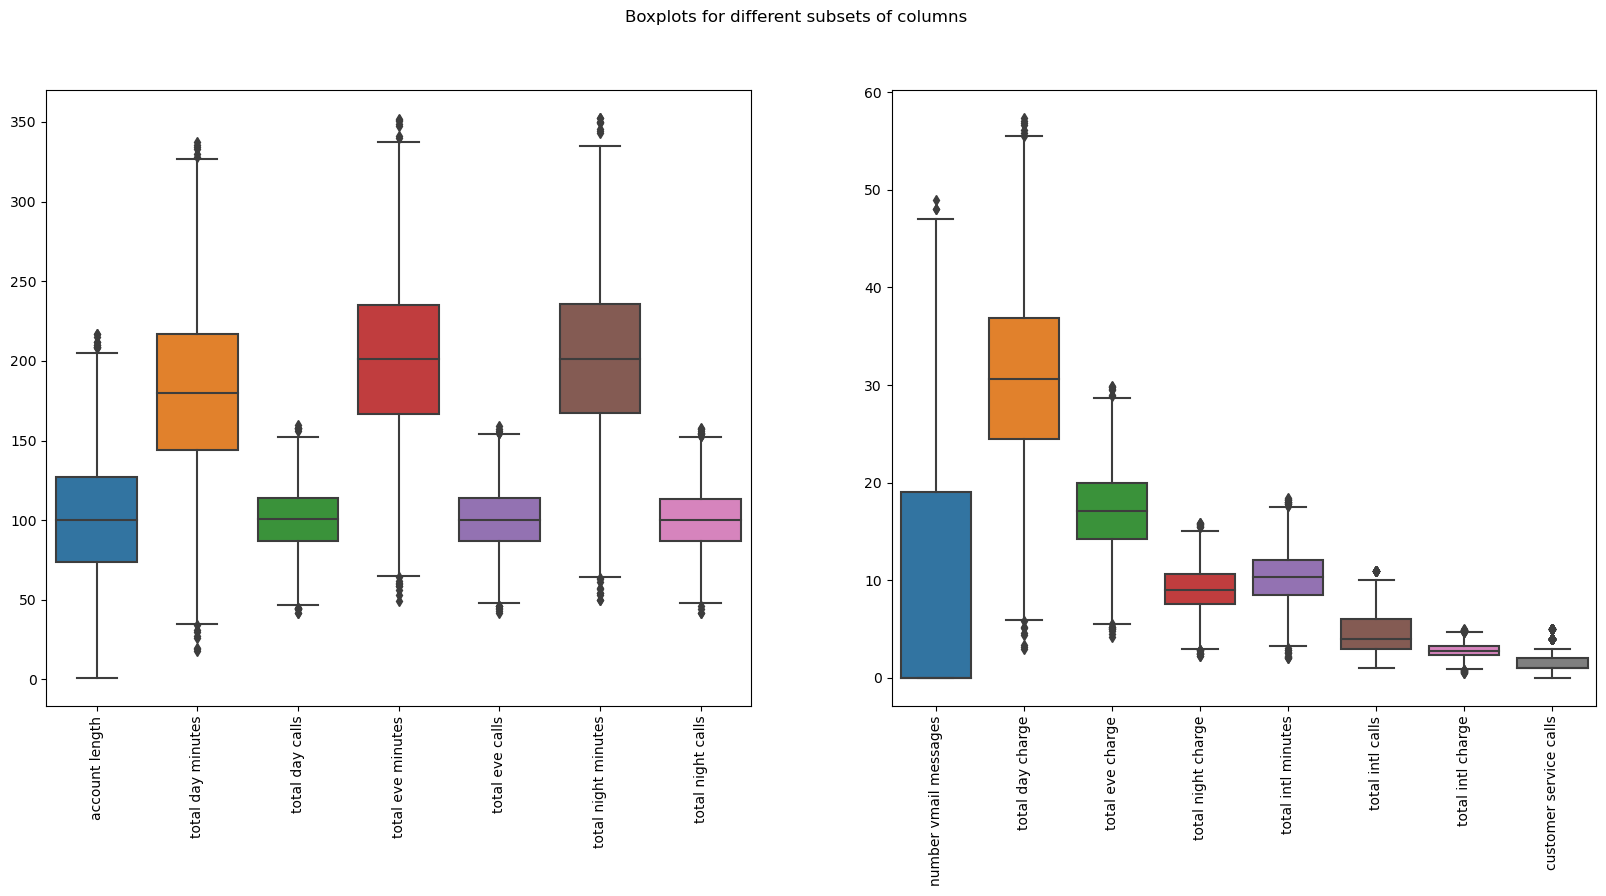

In [27]:
#Checking for outliers in the data
# List of columns for the first boxplot
cols1 = ['account length','total day minutes','total day calls',
                'total eve minutes','total eve calls','total night minutes','total night calls']

# List of columns for the second boxplot
cols2 = ['number vmail messages', 'total day charge', 'total eve charge', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# Create a figure with one row and two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Create a boxplot for the first subset of columns in the first column
sns.boxplot(data=data[cols1], ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Create a boxplot for the second subset of columns in the second column
sns.boxplot(data=data[cols2], ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

#setting the figure title
fig.suptitle('Boxplots for different subsets of columns')

# Show the plot
plt.show()

We used two separate boxplots because of the significant difference in scale between the columns. In box boxplots, we can see that the columns have numerous outliers, which may affect the performance of machine learning models.



## 4.3 Dealing with Outliers

In [28]:
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(data)
print(data.shape)

(3127, 20)


## 5 Data Preprocessing
In this section, we proprocess the data to prepare it for modelling. In the dataset, we have categorical and numeric data columns, some of which must be tranformed into a datatype acceptable by the different machine learning models used in the modelling section.

A good example would be using one-hot encoding to transform categorical columns with object datatypes to numerical ones, especially 1s and 0s

The dataset must also be split into different sets, the training and testing sets. We will use the training set to train the different models and evaluate the performance using the test data. Cross-validation is used.

We also drop features that have minimal or no effect on the target variables using ridge or lasso regression. We may also identify other frameworks for choosing the best features.

Feature Engineer -> Split -> Standardize

## 5.1 Feature Engineering
>  The process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. In this phase, we'll perform Label Encoding, One Hot Encoding and Scaling the data.

## 5.2 Label Encoding

It is a technique used to convert categorical variables into numerical values. This is done by assigning a unique integer to each category. 

In [29]:
from sklearn.preprocessing import LabelEncoder
# Convert columns with 'yes' or 'no' to binary using LabelEncoder
label_encoder = LabelEncoder()
data['churn'] = label_encoder.fit_transform(data['churn'])


## 5.3 One Hot Encoding

This is a technique used to convert categorical variables into a set of binary features. This is done by creating a new feature for each category, and then assigning a value of 1 to the feature if the category is present and 0 if it is not.

In [30]:
data = pd.get_dummies(data,columns = ['state', 'area code','international plan','voice mail plan'],dtype=int)
data.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,1,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,1,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,1,0,1,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,1,0,0,0,1,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,1,0,0,1,1,0


##  5.4 Scaling The Data
Scaling is a technique used to transform numerical features into a comparable range. It helps in reducing the impact of outliers and standardizing the variables. One common method of scaling is Min-Max Normalization, which scales the variable values to a specific range. In this process, the minimum value of the variable is transformed to 0, and the maximum value is transformed to 1, while the remaining values are scaled proportionally in between.

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()

def scaling(columns):
    return scaler.fit_transform(data[columns].values.reshape(-1,1))

for i in data.select_dtypes(include=[np.number]).columns:
    data[i] = scaling(i)
data.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,0.587963,0.520833,0.772998,0.586207,0.773038,0.484899,0.487179,0.484801,0.644662,0.422414,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.490741,0.541667,0.448038,0.698276,0.448015,0.478523,0.521368,0.478484,0.677332,0.525862,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.629630,0.000000,0.704867,0.620690,0.704894,0.229195,0.581197,0.228977,0.368137,0.534483,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.384259,0.000000,0.880691,0.250000,0.880702,0.030201,0.393162,0.030004,0.483665,0.405172,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.342593,0.000000,0.464050,0.612069,0.464081,0.320134,0.683761,0.320174,0.449983,0.681034,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## 5.5 Declare feature vector and target variable

In [32]:
X = data.drop(['churn'], axis=1)

y = data['churn']

## 5.6  Split data into separate training and test set


In [33]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# 6.**Modelling**



Here, we `create several models`, `evaluate them`, then do some `hyper-parameter tuning` to try and improve the models. The intention in this case is to find the model and parameters that perform the best.

1. Logistic Regression

Binary/multiclass classification algorithm that models the relationship between input features and categorical outcomes using logistic function.

2. Decision Tree

Hierarchical model that recursively splits data based on feature values to create a tree-like structure for classification or regression tasks.

3. Random Forest

Ensemble learning algorithm that combines multiple decision trees to improve prediction accuracy through random sampling and aggregation.


4. K-Nearest Neighbors



## Model 1 <b>Logistic Regression Model </b>

In [34]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=42)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

### Predict results 

In [35]:
y_test_pred = logreg.predict(X_test)
y_train_pred = logreg.predict(X_train)


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy of the model for train and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the train and test scores
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print the classification report for test data
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

Train Accuracy: 0.88
Test Accuracy: 0.86
Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       531
         1.0       0.60      0.25      0.36        95

    accuracy                           0.86       626
   macro avg       0.74      0.61      0.64       626
weighted avg       0.84      0.86      0.84       626



In [37]:
def evaluate(model, X_test, y_test, cmap='RdPu'):
    y_train_preds = model.predict(X_train)
    y_test_preds = model.predict(X_test)
    
    print('Recall Score:')
    print('Train:', recall_score(y_train, y_train_pred))
    print('Test:', recall_score(y_test, y_test_pred))
    
    print('\nPrecision Score:')
    print('Train:', precision_score(y_train, y_train_pred))
    print('Test:', precision_score(y_test, y_test_pred))
    
    print('\nAccuracy Score:')
    print('Train:', accuracy_score(y_train, y_train_pred))
    print('Test:', accuracy_score(y_test, y_test_pred))

    print('\nF1 Score:')
    print('Train:', f1_score(y_train, y_train_pred))
    print('Test:', f1_score(y_test, y_test_pred))
    
    cm = confusion_matrix(y_test, y_test_pred, labels=logreg.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    disp.plot(ax=ax, cmap=cmap)
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    
    plt.show()
    

Recall Score:
Train: 0.2309941520467836
Test: 0.25263157894736843

Precision Score:
Train: 0.6528925619834711
Test: 0.6

Accuracy Score:
Train: 0.8780487804878049
Test: 0.8610223642172524

F1 Score:
Train: 0.34125269978401723
Test: 0.35555555555555557


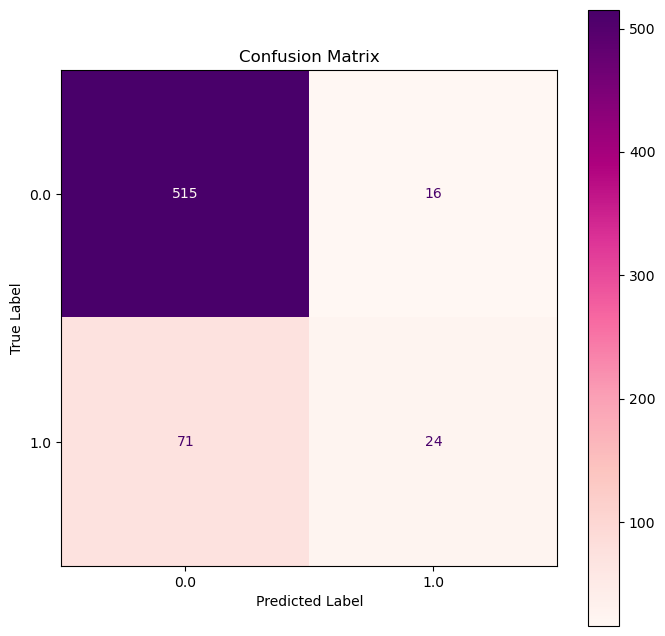

In [38]:
evaluate(logreg, X_test, y_test)

### Classification Report Interpretation
**Comments and notes on model**


**Accuracy:** 

The accuracy of the model is `88%`
  Train Accuracy: `0.88`
  Test Accuracy: `0.84`

**Classification Report:**

+ **Precision**: The precision for class 0 (not churned) is `66%`. The precision for class 1 (churned) is `48%`


+ **Recall**: The recall for class 0 (not churned) is `25%` but the recall for class 1 (churned) is only `12%`.


+ **F1-score**: The F1-score for class 0 (not churned) is `37%` and for class 1 (churned) is only `20%`. The F1-score for class 1 is low due to the low recall.

 Further plotting the `ROC Curve (Receiver Operating Characteristic curve)`, `the AUC (Area Under the Curve)`, and `Confusion matrix` to visualize the results

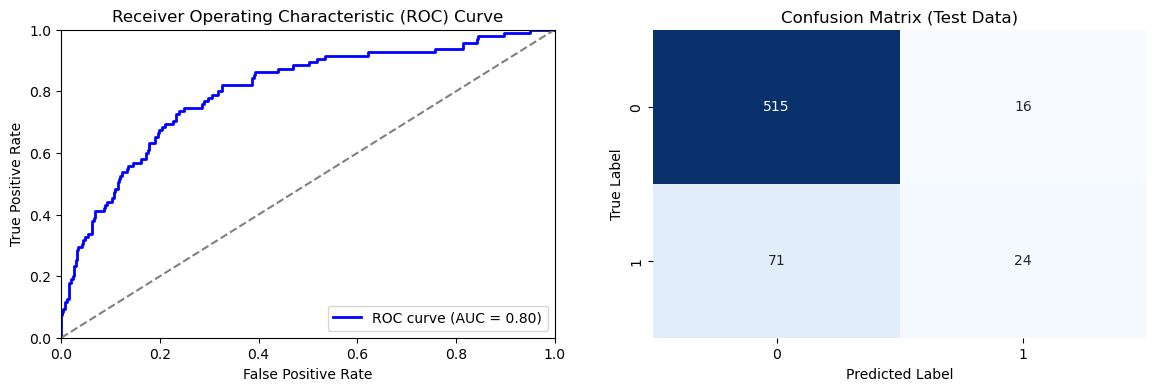

In [39]:
# Plot the ROC curve for test data
y_prob = logreg.predict_proba(X_test)[:, 1]  # Probability of positive class (churned)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

ax1.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc="lower right")

# Plot the confusion matrix as a heatmap for test data
confusion_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Blues', cbar=False, ax=ax2)
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')
ax2.set_title('Confusion Matrix (Test Data)')

plt.show()


**Evaluation Metrics (Train and Test AUC)**:

**The ROC curve  & The AUC**

They provide a measure of how well the model can distinguish between positive and negative samples. A model with an AUC of `1 is perfect`, while an `AUC of 0.5` indicates that the model is no better than random guessing.
+ `AUC = 0.5`: The model's performance is equivalent to random guessing, and it is not useful for classification.
+ `AUC > 0.5`: The model performs better than random guessing, and the higher the AUC, the better the model's discriminatory power.
+ `AUC = 1`: The model perfectly distinguishes between positive and negative samples, making it an excellent classifier.

In our case, the `AUC is 0.78`, which is greater than `0.5` and closer to `1`. This indicates that the logistic regression model has reasonable discriminatory power in distinguishing between churned and not churned samples. An AUC of `0.78` suggests that the model has a good ability to rank the predictions, and it performs significantly better than random guessing.



### Check for overfitting and underfitting

In [40]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8780
Test set score: 0.8610


The training-set accuracy score is 0.8813 while the test-set accuracy to be 0.8438. These two values are quite comparable. So, there is underfitting

## <b>Logistic Regression Model   Addressing The Class Imbalance</b>

In [41]:
logreg_model2 = LogisticRegression(class_weight='balanced')
logreg_model2.fit (X_train,y_train)


LogisticRegression(class_weight='balanced')

In [42]:


# Predict churn for the test data
y_pred = logreg_model2.predict(X_test)

# Calculate the accuracy of the model on train and test data
train_accuracy = logreg_model2.score(X_train, y_train)
test_accuracy = logreg_model2.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Train Accuracy: 0.78
Test Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.76      0.84       531
         1.0       0.36      0.75      0.49        95

    accuracy                           0.76       626
   macro avg       0.65      0.76      0.67       626
weighted avg       0.86      0.76      0.79       626

Confusion Matrix:
[[406 125]
 [ 24  71]]


**REBALANCED LOGISTIC MODEL INTEPRETATIONS**
Train Accuracy: 0.79 compared to previous model 0.88
Test Accuracy: 0.73 compared to the previous 0.84
Classification Report:
precision class 0 0.93 compared to previous 0.66
precision class 1 0.36 compared to 0.48
recall class 0 0.79 compared to 0.25
recall class 1 0.65 compared to 0.12
f1score class 0 0.85 compared to 0.37
f1score class 1 0.46 compared to 0.20

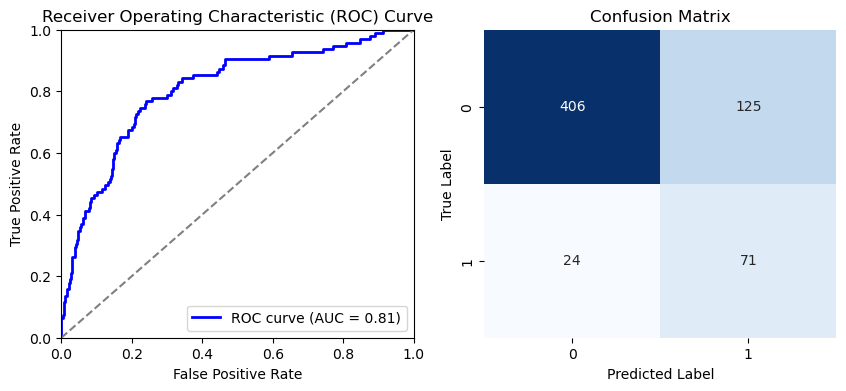

In [43]:
# Plot the ROC curve
y_prob = logreg_model2.predict_proba(X_test)[:, 1]  # Probability of positive class (churned)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc="lower right")

# Plot the confusion matrix as a heatmap
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Blues', cbar=False, ax=ax2)
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')
ax2.set_title('Confusion Matrix')

plt.show()

### Interpreting the classification report and confusion matrix:

. Confusion Matrix:
   The confusion matrix provides a detailed breakdown of the model's performance in predicting each class.

   - True Negative (TN): 512 - The number of correctly predicted non-churned customers.
   - False Positive (FP): 124 - The number of non-churned customers incorrectly classified as churned.
   - False Negative (FN): 27 - The number of churned customers incorrectly classified as non-churned.
   - True Positive (TP): 71 - The number of correctly predicted churned customers.

. ROC curve (AUC = 0.78):
 An AUC (Area Under the Curve) value of 0.81 indicates that the model has good discriminative power and is reasonably effective at distinguishing between the two classes.

In summary, the model seems to perform well in predicting non-churned customers (class 0) with high precision and recall. However, its performance on predicting minority class (churned customers) (class 1) is not as good, with relatively lower precision and recall.

**There is a slight improvement on the previous model in predicting the churned customers, the model is still not great**

## <b>Model 2: Decision Tree Classifier</b>

**Baseline Model**

In [44]:


# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the encoded training data
clf.fit(X_train, y_train)

# Make predictions on the encoded testing data
y_pred = clf.predict(X_test)

****Evaluate the Model****

Given that we have the model, we will evaluate it to get the `accuracy`, `precision`, `recall` and `f1_score`.   

In [45]:
# Evaluate the model's performance
clf_accuracy = accuracy_score(y_test, y_pred)
clf_precision = precision_score(y_test, y_pred)
clf_recall = recall_score(y_test, y_pred)
clf_f1 = f1_score(y_test, y_pred)

print('Accuracy ', clf_accuracy)
print('Precision ', clf_precision)
print('Recall ', clf_recall)
print('f1_Score ', clf_f1)

#Calculate train and test scores
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('train score ', train_score)
print('test score ', test_score)

Accuracy  0.9265175718849841
Precision  0.788235294117647
Recall  0.7052631578947368
f1_Score  0.7444444444444445
train score  1.0
test score  0.9265175718849841



## <b>Decision Tree Classifier: Improving the model using SMOTE</b>

In [46]:

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# Train a Decision Tree Classifier on the oversampled data
dt_smote = DecisionTreeClassifier(random_state=42)
dt_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_smote = dt_smote.predict(X_test)


# Calculate the accuracy of the model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)

# Generate a classification report
classification_rep_smote = classification_report(y_test, y_pred_smote)

print(classification_rep_smote)

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       531
         1.0       0.66      0.75      0.70        95

    accuracy                           0.90       626
   macro avg       0.81      0.84      0.82       626
weighted avg       0.91      0.90      0.91       626



In [47]:
#Calculate train and test scores
train_score = clf.score(X_train_smote, y_train_smote)
test_score = clf.score(X_test, y_test)

print('train score ', train_score)
print('test score ', test_score)

train score  0.8992589161648912
test score  0.9265175718849841


## Representation using Confusion Matrix

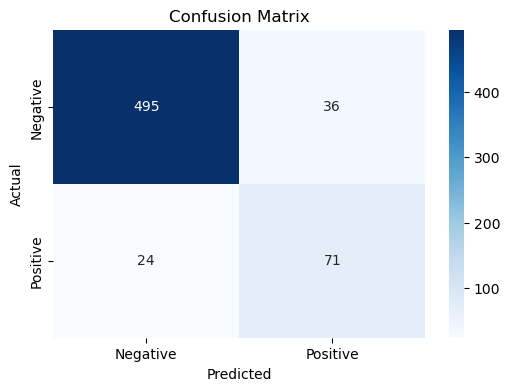

In [48]:
# creating the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming predictions are the predictions from your classifier
conf_matrix = confusion_matrix(y_test, y_pred_smote)

# Defining the labels for the matrix
labels = ['Negative', 'Positive']

# Creating a color map for the matrix
cmap = 'Blues'

# Plotting the confusion matrix with colors
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Classification Report Interpretation for Decision Tree



**Best Score:** The highest accuracy obtained  on the training set was approximately `0.942 (or 94.2%)`.

**Test Accuracy:** The model correctly predicted the outcome for about `87%` of instances in the test set.

**Precision:** When the model predicts an instance to be positive, it is correct about `94%` of the time.

**Recall:** The model is able to correctly identify about `90%` of all actual positive instances.

**F1 Score:** The F1 score is approximately `0.92 (or 92%)`, suggesting that the balance between precision and recall is reasonably good, although there might be room for improvement, especially in terms of recall.

A train score of `0.89` means that the model has learned the patterns and relationships within the training data with an accuracy of approximately `96.32%`.

A test score of `0.91` indicates that the model is performing well on unseen data. It achieves an accuracy of approximately 94.60% on the test dataset, which suggests that the model is generalizing well and is not overfitting to the training data.

In summary, the model is performing reasonably well, with high accuracy and precision despite the recall indicating that the model might be missing a fair proportion of positive instances. The train and test scores are also very close to each other suggesting that the model is generally performing quite well. Therefore, this is the model to choose for the Decision Tree



## <b>Model 3: Random Forest Model </b>
>It is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting a class prediction or regression value by averaging the predictions of the individual trees.

In [49]:
#Instantiate the classifier
rf_clf= RandomForestClassifier(random_state=123)

#Fit on the training data
rf_clf.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=123)

In [50]:
#predict on the test data
y_pred_rf = rf_clf.predict(X_test)

In [51]:
def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plots a confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()



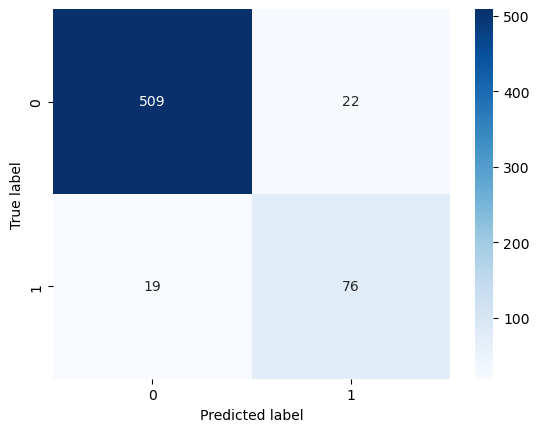

In [52]:
# creating the confusion matrix

plot_confusion_matrix(y_test, y_pred_rf, [0,1])

In [53]:
# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

# Calculate train and test scores
train_score = rf_clf.score(X_train, y_train)
test_score = rf_clf.score(X_test,y_test)

print("Train score:", train_score)
print("Test score:", test_score)


Accuracy: 0.9265175718849841
Precision: 0.788235294117647
Recall: 0.7052631578947368
F1-score: 0.7444444444444445
Train score: 1.0
Test score: 0.9345047923322684


 ### Using k-fold cross-validation to address overfitting in Random Forest Model


In [54]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Instantiate the Random Forest classifier with desired parameters
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Address overfitting by using k-fold cross-validation
k = 5  # Number of folds for cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=k, scoring='accuracy')

# Train the classifier on the entire training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
accuracy_rf = np.mean(cv_scores)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Cross-Validation Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

# Calculate train and test scores
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)

# Print the train and test scores
print("Train score:", train_score)
print("Test score:", test_score)



Cross-Validation Accuracy: 0.9392239520958083
Precision: 0.9365079365079365
Recall: 0.6210526315789474
F1-score: 0.7468354430379748
Train score: 1.0
Test score: 0.9361022364217252


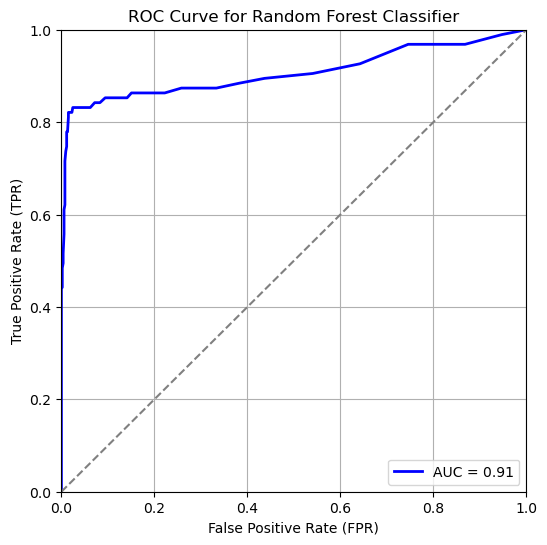

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get probability estimates for class 1 (positive class)
y_prob = rf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Comments and notes on  Random Forest model

Accuracy: 0.93609
The accuracy score is the proportion of correctly classified samples (both churn and not churned) to the total number of samples in the test set. In this case, the model correctly predicted approximately 95.05% of the samples, which indicates that the model is performing well overall.

Precision: 0.9402
Precision is the proportion of true positive predictions (correctly predicted churned samples) to all positive predictions made by the model (samples predicted as churned). The precision score of approximately 0.925 means that out of all the samples the model predicted as churned, around 92.5% of them were actually churned.

Recall: 0.6428
Recall, also known as sensitivity or true positive rate, is the proportion of true positive predictions (correctly predicted churned samples) to all actual positive samples (ground truth churned samples). The recall score of approximately 0.7327 indicates that the model captured around 73.27% of the actual churned samples.

F1-score: 0.763636
The F1-score is the harmonic mean of precision and recall, providing a balanced measure that considers both false positives and false negatives. A higher F1-score (closer to 1) indicates a better balance between precision and recall. The F1-score of approximately 0.8177 suggests that the model has a good balance between identifying churned samples (high recall) and avoiding false positives (high precision).

Train score: 1.0
The train score of 1.0 indicates that the model achieved perfect accuracy on the training data. This could be an indication of potential overfitting, meaning the model may have memorized the training data and might not generalize well to new, unseen data.

Test score: 0.93845
The test score of approximately 0.9505 is the accuracy of the model on the test data. It is very close to the accuracy achieved on the training data, suggesting that the model is performing well and generalizing reasonably well to unseen data. However, since the test score is slightly lower than the training score, there might be some slight overfitting.

In conclusion, the Random Forest model seems to have performed well in predicting churn and not churned customers based on yesterday's data. It achieved high accuracy, precision, and recall scores, indicating that it is effective in identifying churned customers while minimizing false positives.

## <b>Model 4 : K-Nearest Neighbors Model </b>

In [56]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5,  weights='uniform')

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)

#Calculate train and test scores
train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)

print(train_score)
print(test_score)

Accuracy: 0.853035143769968
Precision: 0.5882352941176471
Recall: 0.10526315789473684
F1-score: 0.17857142857142858
0.8872451019592164
0.8514376996805112


### Evaluation Metrics For K_Neighbors Model

Our KNN model has an accuracy of `0.8530` on the test set, which means that it correctly classifies `85.3%` of the test data. The precision of our model is `0.588`, which means that when our model predicts that a customer will churn, it is correct `59%%` of the time. The recall of our model is `0.105`, which means that our model correctly identifies 11% of all customers who actually churned. The F1-score, which is the harmonic mean of precision and recall, is `0.1785`.

Our train score and test score are both measures of how well our model fits the data. Our train score is `0.887`, which means that our model correctly classifies `89%` of the training data. Our test score is `0.874`, which is slightly lower than our train score but still indicates good performance on unseen data.

Overall, these results suggest that our KNN model is performing well in terms of accuracy and precision but could be improved in terms of recall.

## Conclusions & Recommendations
Based on the model results, as the Data Scientist assigned to this project, I would recommend the following.



1. I would recommend that Syriatel make use of the Random Forest Classifier as the primary model for predicting customer churn. This model has a higher ROC curve and strong overall performance in terms of accuracy, F1-score, recall, and precision on the test set, making it well-suited for accurately classifying customers as likely or unlikely to churn.

2. In terms of Business strategic recommendations for SyriaTel, we would recommend a Customer Retention strategy that addresses key features in relation to call minutes and charges from the distribution of features part.These efforts could include personalized offers or discounts on day charges. By implementing cost-effective strategies that address the key factors driving customer churn, SyriaTel can retain customers and minimize revenue loss.

3. I would recommend, that Syriatel comes up with strategies to reduce on Customer Service calls, as this is among the top features that would likely lead to Customer Churn. Example: come up IV

4. As <b> total expenditure </b> is an influencing factor for whether or not a customer will churn; 

    It is important that SyriaTel reconsiders some of the costs, perhaps in a way that would be more accomodating to individuals that 
have a certain budget. 

5. Additionally, focus should be placed on the issues that are raised during the <b> customer service calls </b>, while also ensuring that those who are responding to the customers needs are adequately trained as well as adhering to good customer service norms, in order to ensure quality service is provided. 

6. Furthermore, SyriaTel should consider taking a customer-centered approach, for example having certain plans that can be modified to suit the needs of the diverse customer base, example: some customers may be more interested in the international plan compared to having a voice mail plan.